Sales Data Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Import data

In [3]:
df = pd.read_csv("sales_data.csv")

Display and Summary Statistics

In [4]:
df

,Date,Store,Product,Quantity,Price
0,2023-01-01,Store A,Product 1,10,5.99
1,2023-01-01,Store A,Product 2,5,15.49
2,2023-01-02,Store B,Product 1,8,5.99
3,2023-01-02,Store B,Product 3,3,22.99
4,2023-02-01,Store A,Product 1,6,5.99
5,2023-02-01,Store A,Product 3,2,22.99
6,2023-02-02,Store B,Product 2,7,15.49
7,2023-02-02,Store B,Product 3,4,22.99
8,2023-03-01,Store A,Product 1,15,5.99
9,2023-03-01,Store A,Product 2,9,15.49


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      13 non-null     object 
 1   Store     13 non-null     object 
 2   Product   13 non-null     object 
 3   Quantity  13 non-null     int64  
 4   Price     13 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 652.0+ bytes


,Quantity,Price
count,13.000000,13.000000
mean,6.923077,14.143846
std,3.499084,7.375027
min,2.000000,5.990000
25%,5.000000,5.990000
50%,6.000000,15.490000
75%,9.000000,22.990000
max,15.000000,22.990000


Check Missing Values

In [6]:
#Count number of missing values for each column
df.isnull().sum()

Date        0
Store       0
Product     0
Quantity    0
Price       0
dtype: int64

In [7]:
#Remove rows with missing values if any
df.dropna(inplace=True)

Change Data Type

In [8]:
#Convert 'Date' to datetime format
df['Date']=pd.to_datetime(df['Date'])

Find Total Sales For each Store

In [9]:
df['Total_Sales']=df['Quantity']*df['Price']

In [10]:
df.groupby('Store')['Total_Sales'].sum()

Store
Store A    448.53
Store B    592.57
Name: Total_Sales, dtype: float64

Find Best Selling Products

In [11]:
#Group data by 'Product', sum the 'Quantity' of each product and arrange in descending order
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

Product
Product 1    49
Product 2    26
Product 3    15
Name: Quantity, dtype: int64

Monthly Sales

In [14]:
df['Month']=df['Date'].dt.to_period('M')

In [15]:
df.groupby('Month')['Total_Sales'].sum()

Month
2023-01    254.24
2023-02    282.31
2023-03    504.55
Freq: M, Name: Total_Sales, dtype: float64

Bar Chart of Sales for Each Store

Text(0, 0.5, 'Total Sales')

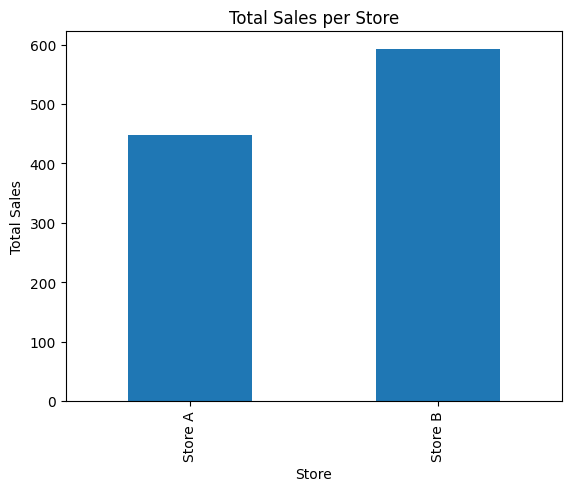

In [26]:
Total_Sales_per_Store = df.groupby('Store')['Total_Sales'].sum()
Total_Sales_per_Store.plot(kind='bar',title='Total Sales per Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

Line Graph of Monthly Sales over Time

In [27]:
Monthly_Sales = df.groupby('Month')['Total_Sales'].sum()

Text(0, 0.5, 'Total Sales')

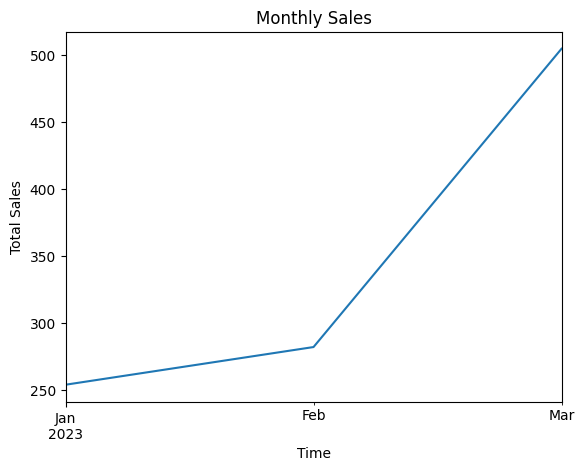

In [28]:
Monthly_Sales.plot(kind='line', title='Monthly Sales')
plt.xlabel('Time')
plt.ylabel('Total Sales')